<a id = "table_of_contents"></a>
#  Table of Contents 

- [Importing the libraries](#1)  
- [Scraping the meta-data](#2)  
- [20 most commented posts](#3)  
- [Manipulating the caption column](#4)  
- [10 most common words of the posts](#5)  
- [Word Cloud](#6)  
- [Scraping the relations](#7)  
- [Finding important people in the network by different methods](#8)  

<a id = "1"></a>
## Importing the libraries

In [1]:
import pandas as pd
from instagram_scrape import scrape
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
from pyvis.network import Network
import re
regex = re.compile('[^a-zA-Z]')

<a id = "2"></a>
## Scraping the meta-data

In [34]:
# Defining a scraper
bot = scrape()

# Logining to our account
bot.login(username="xxxxxxxxxxxxxxx", password="xxxxxxxxx")

# Scraping the meta-data of the posts
posts = bot.get_metadata('barackobama', top_n=20)

<a id = "3"></a>
## 20 most commented posts

In [158]:
posts

comments  likes                                                url  \
248       165    907  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
90        121   2344  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
181       114    538  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
298        92    441  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
96         89   4422  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
68         86   1224  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
116        72   1943  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
111        66   2266  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
70         60   1565  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
91         55   1373  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
134        47   1123  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
306        47   1845  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
119        46   3478  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
179        46  15800  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
27         43  32000  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
37         42    664  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
109        42   5402  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
58         41   1913  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
182        41    938  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   
69         39   4321  https://instagram.ftzx1-1.fna.fbcdn.net/v/t51....   

                                               caption  
248  Illustrated Story Spotlight: ‘Medication,’ by ...  
90   "Becoming anti-racist in your writing — even w...  
181  How can you tell you're getting better as a de...  
298  What is one word you felt defined 2018?\n.\nTe...  
96   We are excited to announce a new partnership w...  
68   This year, more than ever, it’s important to s...  
116  Via @forgemag: Messier people tend to have an ...  
111  From our health publication, @elemental: Exerc...  
70   Notice some changes in your app? 👀\n\nToday, w...  
91   Monument Avenue, in the seat of the Old South,...  
134  New from @Elemental: Coffee ranks as the 11th ...  
306  It’s time to design an iPhone for kids.\n.\nWa...  
119  Via our wellness publication, @Elemental: So, ...  
179                                                     
27                                                      
37   What final pre-pandemic memory do you keep ret...  
109  “If, going forward, we can channel our justifi...  
58   📝 In an era of endless distraction, how do you...  
182  Via @zora: Let's be honest, the "perfect beach...  
69   Sen. @kamalaharris has just shattered a number...

<a id = "4"></a>
## Manipulating the caption column

In [159]:
# Defining the stopwords
stop_words = stopwords.words('english')

# Appending our words into a list
caption = posts["caption"]

# Tokenization of words
caption = list(map(lambda word: nltk.word_tokenize(word), caption))

# Creating one list for all of the words
words_list = [word for row in caption for word in row]

# Getting only the alphabet letters (a-z) and numbers (0-9)
words_list = list(map(lambda word: re.sub('\W+', '', word), words_list))

# lowering the words
words_list = list(map(lambda word: word.lower(), words_list))

# Removing stop words
words_list = [word for word in words_list if not word in stop_words]

# Removing empty items
words_list = [item for item in words_list if item != '']

<a id = "5"></a>
## 10 most common words of the posts

In [160]:
# Initializing a counter object
counter = Counter(words_list)

# Finding 10 most frequent words
most_occur = counter.most_common(10)
df = pd.DataFrame(most_occur, columns=["word", "freq"])
df

word  freq
0         link    16
1          bio    16
2         read    10
3       medium     8
4         kids     7
5  publication     6
6        story     5
7       writes     5
8       better     5
9          get     5

<a id = "6"></a>
## Word Cloud

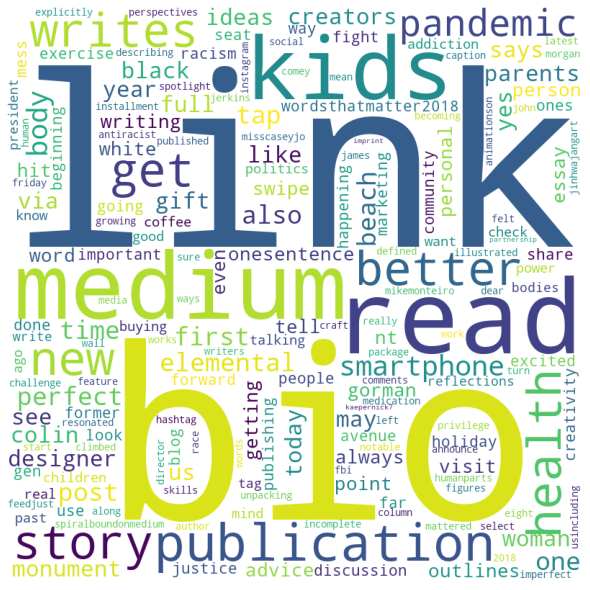

In [161]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate_from_frequencies(counter)
  
# plotting the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<a id = "7"></a>
## Scraping the relations

In [6]:
# Scraping the relations of the followers
relations = bot.get_relations('barackobama', 30)

# Saving the data
relations.to_csv('relations.csv')

In [7]:
# Creating the network graph
G = nx.from_pandas_edgelist(relations,  source='source', target='target')
nt = Network('1000px', '1000px', notebook=True)
nt.from_nx(G)
nt.show_buttons(filter_=["physics"])
nt.repulsion()
nt.show('nx/index.html')

<a id = "8"></a>
## Finding important people in the network by different methods

In [8]:
# Centrality
centrality = nx.degree_centrality(G)

centrality_sorted = sorted(centrality.items(),
                           key=lambda x:x[1],
                           reverse=True)[0:5]

centrality_sorted

[('its_vlanermane', 0.2663951120162933),
 ('mr_theug', 0.14663951120162932),
 ('rose_tluangi', 0.13441955193482688),
 ('harshraj9926', 0.10549898167006111),
 ('wildnz_art', 0.08879837067209777)]

In [9]:
# Betweenness
betweenness = sorted(nx.betweenness_centrality(G).items(),
                     key=lambda x:x[1], reverse=True)[0:5]

betweenness

[('mr_theug', 0.4081438177330498),
 ('itsaqiila', 0.3522210863972357),
 ('its_vlanermane', 0.341426857020501),
 ('_king_sfa', 0.30358050450073615),
 ('nelyoktaviami', 0.2907560207616477)]

In [10]:
# Page Rank
page_rank = sorted(nx.pagerank_numpy(G,
                   weight=None).items(),
                   key=lambda x:x[1], reverse=True)[0:5]

page_rank

[('its_vlanermane', 0.12247471469114088),
 ('mr_theug', 0.06719499178288554),
 ('rose_tluangi', 0.06185700977598569),
 ('harshraj9926', 0.04867285852628041),
 ('wildnz_art', 0.04063464645815263)]